# Régression Linéaire Simple Numpy

In [14]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

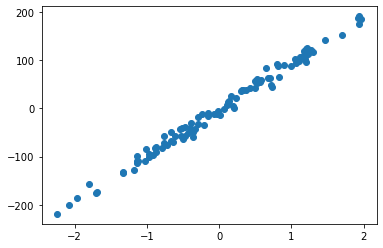

In [15]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats.

In [16]:
print(x.shape)
print(y.shape)

# redimensionner y. On remarque que n'y a pas les dimensions(100,1)
# on corrige le problème avec np.reshape
y = y.reshape(y.shape[0], 1)

print(y.shape)

(100, 1)
(100,)
(100, 1)


In [17]:
#matrice X
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
X

(100, 2)


array([[ 0.52355016,  1.        ],
       [-0.03530386,  1.        ],
       [ 0.72739009,  1.        ],
       [ 0.31855089,  1.        ],
       [ 1.1203963 ,  1.        ],
       [-1.70524971,  1.        ],
       [-0.7259239 ,  1.        ],
       [-0.88695936,  1.        ],
       [-0.78492007,  1.        ],
       [ 0.06161322,  1.        ],
       [-1.79540518,  1.        ],
       [-0.66139136,  1.        ],
       [-0.43727651,  1.        ],
       [-0.33630518,  1.        ],
       [-0.54769434,  1.        ],
       [-0.07742133,  1.        ],
       [ 0.56536884,  1.        ],
       [ 1.10859735,  1.        ],
       [ 0.89749123,  1.        ],
       [-0.23706702,  1.        ],
       [-1.17703547,  1.        ],
       [ 0.23649304,  1.        ],
       [-0.15395858,  1.        ],
       [ 0.83428603,  1.        ],
       [ 0.16436773,  1.        ],
       [ 1.46035249,  1.        ],
       [-0.46644897,  1.        ],
       [ 0.52135191,  1.        ],
       [-0.40316967,

In [18]:
theta = np.random.randn(2, 1)
theta

array([[-0.48370321],
       [-0.11684942]])

# 2. Modèle Linéaire

In [19]:
def model(X, theta):
    return X.dot(theta)

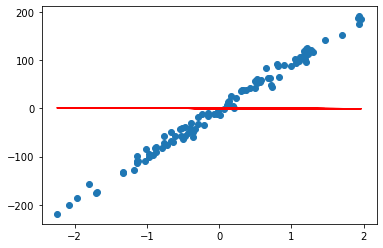

In [20]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

# 3. Fonction Cout 

In [21]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [22]:
cost_function(X, y, theta)

4373.73410079119

# 4. Gradients et Descente de Gradient

In [25]:
def grad(X, y, theta):
    m = len(y)
    XT = np.transpose(X)
    return 1/m * XT.dot(model(X, theta) - y)

In [29]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)# création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)# mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta)# on enregistre la valeur du Cout au tour i dans cost_history[i]
    return theta, cost_history

# 5. Phase d'entrainement

In [30]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [31]:
theta_final# voici les parametres du modele une fois que la machine a été entrainée

array([[95.953667  ],
       [-1.92724965]])

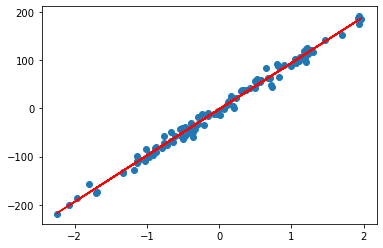

In [32]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# 6. Courbes d'apprentissage

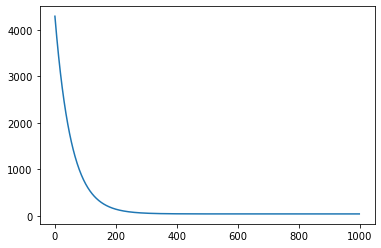

In [33]:
plt.plot(range(1000), cost_history)

# 7. Evaluation finale

In [34]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [35]:
coef_determination(y, predictions)

0.990082776925428